In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config, DataAdapter
from toolbox_continu_inzicht.fragility_curves import (
    ChangeCrestHeightFragilityCurveOvertopping,
    FragilityCurvesOvertopping,
    ShiftFragilityCurveOvertopping,
)

c:\Data\Python\TBCI\toolbox-continu-inzicht\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "demo_fragility_multiple_curves_overtopping_db.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

```yaml
GlobalVariables:
    rootdir: "data_sets"
    moments: [-24,0,24,48]

    FragilityCurvesOvertopping:
        gh_onz_mu: 0.96 # default waarde

DataAdapter:
    slopes:
        type: ci_postgresql_slopes
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"

    profiles:
        type: ci_postgresql_profiles
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    
    bedlevel:
        type: ci_postgresql_bedlevelfetch
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    
    fragility_curves:
        type: ci_postgresql_fragilitycurves_table
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"

    read_fc:
        type: ci_postgresql_fragilitycurves_table
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"

```

In [3]:
fragility_curves_overtopping = FragilityCurvesOvertopping(data_adapter=data_adapter)
fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel"],
    output="fragility_curves",
)

In [4]:
fragility_curves_overtopping.df_out

,waterlevels,failure_probability,section_id
0,10.80,0.000000,10
1,10.90,0.000000,10
2,11.00,0.000000,10
3,11.10,0.000000,10
4,11.20,0.000000,10
...,...,...,...
76,14.75,0.995562,14
77,14.80,0.996593,14
78,14.85,0.997369,14
79,14.90,0.997956,14


In [6]:
ids = fragility_curves_overtopping.df_out.section_id.unique()
df = fragility_curves_overtopping.df_out.set_index("waterlevels")

In [7]:
df

,failure_probability,section_id
waterlevels,,
10.80,0.000000,10
10.90,0.000000,10
11.00,0.000000,10
11.10,0.000000,10
11.20,0.000000,10
...,...,...
14.75,0.995562,14
14.80,0.996593,14
14.85,0.997369,14


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
shift_fragility_curves_overtopping = FragilityCurvesOvertopping(
    data_adapter=data_adapter
)
shift_fragility_curves_overtopping.fragility_curve_function = (
    ShiftFragilityCurveOvertopping
)
shift_fragility_curves_overtopping.effect = 0.5
shift_fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel"],
    output="fragility_curves",
)

KeyError: 'windspeed'

In [ ]:
df_shift = shift_fragility_curves_overtopping.df_out.set_index("waterlevels")

KeyError: 'section_id'

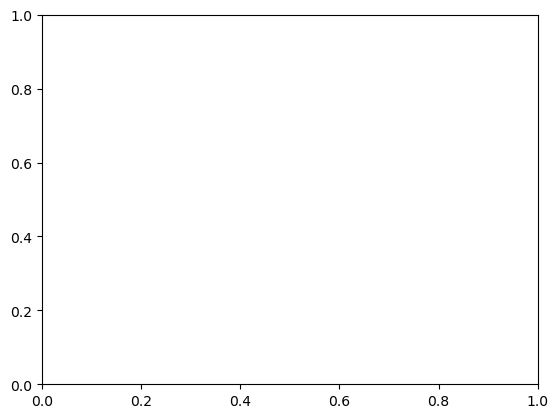

In [ ]:
fig, ax = plt.subplots(1, 1)
for i, id in enumerate(ids):
    df[df["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ls="--", label=f"section {id}", ax=ax
    )
    df_shift[df_shift["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ax=ax
    )
ax.legend()

In [ ]:
change_crest_fragility_curves_overtopping = FragilityCurvesOvertopping(
    data_adapter=data_adapter
)
change_crest_fragility_curves_overtopping.fragility_curve_function = (
    ChangeCrestHeightFragilityCurveOvertopping
)
change_crest_fragility_curves_overtopping.effect = 0.5
change_crest_fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel"],
    output="fragility_curves",
)

In [ ]:
df_change_crest = change_crest_fragility_curves_overtopping.df_out.set_index(
    "waterlevels"
)

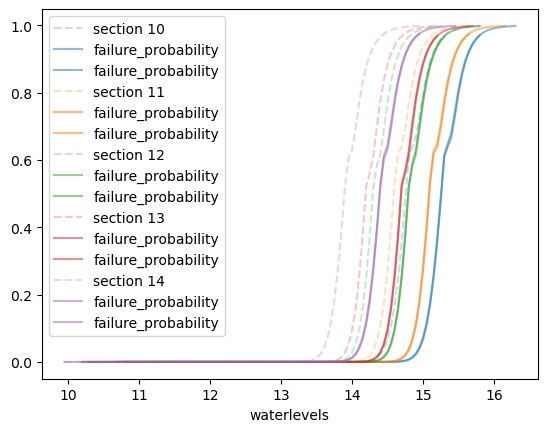

In [ ]:
fig, ax = plt.subplots(1, 1)
for i, id in enumerate(ids):
    df[df["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ls="--", label=f"section {id}", ax=ax, alpha=0.25
    )
    df_shift[df_shift["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ax=ax, alpha=0.5
    )
    df_change_crest[df_change_crest["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ax=ax, alpha=0.5
    )
ax.legend()